# Linear Regression Model
Under the MSE measure(cost function is MSE), we can get $\hat{\theta}$ in two ways. (1) Analytic Method: Normal Equation (2) Numerical Method: Gradient Descent
## Normal Equation
Normal equation is $(X^TX)^{-1}X^Ty$. We will create dataset, then obtain value of the normal equation as below.
### Create dataset
From y = 4 + 3 * X, we can know that $\theta_{0} = 4, \theta_1 = 3$

In [1]:
import numpy as np

np.random.seed(seed = 42)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(X.shape[0], X.shape[1])
print(X.shape, y.shape)

(100, 1) (100, 1)


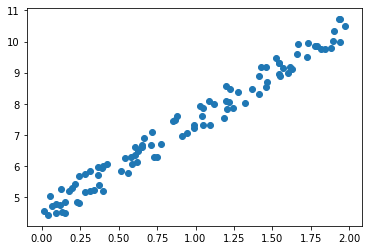

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(X, y)

get_normal_eq: return $(X^TX)^{-1}X^Ty$

In [3]:
def get_normal_eq(X, y):
    return ((np.linalg.inv((X.T).dot(X))).dot(X.T)).dot(y)

Normal equation below shows that $\hat{\theta_{0}} = 4.51359766, \hat{\theta_1} = 2.98323418$. Estimated values are not exactly same with $\theta_{0} = 4, \theta_1 = 3$. This is due to Gaussian noise.

In [4]:
X_const = np.c_[np.ones(shape = (100,1)), X]
theta_best = get_normal_eq(X_const, y)
print(theta_best)

[[4.51359766]
 [2.98323418]]


Prediction result: [[ 4.51359766]
 [10.48006601]]


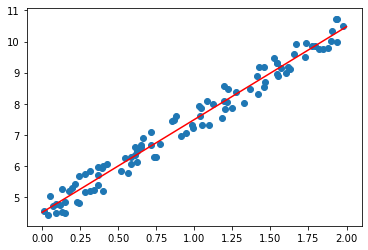

In [5]:
X_new = np.array([[0],[2]])
X_new_const = np.c_[np.ones(shape = (2,1)), X_new]
y_predict = (X_new_const).dot(theta_best)
print('Prediction result: {0}'.format(y_predict))

plt.scatter(X, y) #plot of dataset
plt.plot(X_new, y_predict, 'r-')

### Using ScikitLearn

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print(lin_reg.intercept_, lin_reg.coef_)
print('Prediction result: {0}'.format(lin_reg.predict(X_new)))

[4.51359766] [[2.98323418]]
Prediction result: [[ 4.51359766]
 [10.48006601]]


Since LinearRegression class is based on the function scipy.linalg.lstsq(), we can call the function directly. This function use Moore-Penrose inverset matrix($X^+$). That is, $\hat{\theta} = X^+y$

In [8]:
#Calculation using lstsq function
theta_bset_svd, residuals, rank, s = np.linalg.lstsq(X_const, y, rcond = 1e-6)
print(theta_bset_svd)

[[4.51359766]
 [2.98323418]]


Since the pseudo inverse matrix $X^+$ is calculated using SVD(Singular Value Decomposition), np.linalg.pinv() functin return the same reault. $X^+ = V \Sigma^{+} U^T$ (refer to Linear Algebra for details). Since calculation of $X^+$ is <b>(1) more efficient</b> and <b>(2) available always</b>, many packages use $X^+$

In [9]:
#Calculation using pinv function
print(np.linalg.pinv(X_const).dot(y))

[[4.51359766]
 [2.98323418]]


### Computational Complexity
(1) Difference: When $X$ is m by n matrix, computational complexity of $X^TX$ is between $O(n^{2.4}), O(n^{3})$. Compared to the computational complexity of $X^+$ (using SVD), $O(n^{2})$, former is inefficient.

(2) Commonalities: Both methods get slow when n is very high. Computational complexity on m is $O(m)$.

## Gradient Descent
Basic concept: repeatedly revise the values of parameters in order to minimise the cost function. This method is appropriate when # of samples and attributes are to big to save them all in the memory.
### Remember
1. Every attribute must have same scale (StandardSclaer...) for the efficient optimization
2. Most important hyperparameter is 'learing rate'
3. Due to the property of random initialization, local minimum can be obtained. (Since MSE function is convex globally, global minimum is obtained always)

### Batch gradient descent

$\partial \over \partial \theta_j$ $MSE(\theta) = $ $2 \over m$ $\Sigma^m_{i=1}(\theta^Tx^i - y^i)x^i_j$

$\nabla_{\theta}$ $MSE(\theta) = $ $2 \over m$ $X^T(X\theta - y)$

$\theta_{next} = \theta_{present} - \eta \nabla_{\theta}MSE(\theta)$

In each step, the batch gradient algorithm uses whole train data. Thus, batch gradient algorithm is very slow when train set is very big. However, this method is not sensitive to the number of attributes. <b>When there are a lot of attributes, GD is proper than normal equation and SVD</b>.

In [10]:
def get_theta_grad(X_const, y, n_iter, learning_rate):
    theta = np.random.rand(2,1)
    for _ in range(n_iter):
        grad = (2 / len(X_const)) * (X_const.T).dot(X_const.dot(theta) - y)
        theta = theta - eta * grad
    return theta

In [11]:
eta = 0.1
n_iter = 100

theta_opt = get_theta_grad(X_const, y, n_iter, eta)
    
print(theta_opt.flatten())
print(theta_bset_svd.flatten())
print(lin_reg.intercept_, lin_reg.coef_[0])

[4.49027073 3.00383059]
[4.51359766 2.98323418]
[4.51359766] [2.98323418]


### Learning rate comparison
Compare first ten steps.

In [12]:
def get_thetas_grad(X_const, y, n_iter, learning_rate):
    theta = np.random.rand(2,1)
    thetas = theta.copy()
    for n in range(n_iter):
        grad = (2 / len(X_const)) * (X_const.T).dot(X_const.dot(theta) - y)
        theta = theta - learning_rate * grad
        thetas = np.c_[thetas, theta]
    return thetas

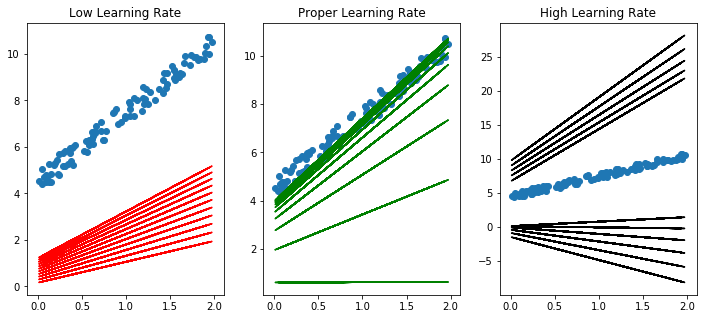

In [13]:
n_iter = 10
thetas_low_lr = get_thetas_grad(X_const, y, n_iter, learning_rate = 0.01)
thetas_prop_lr = get_thetas_grad(X_const, y, n_iter, learning_rate = 0.1)
thetas_high_lr = get_thetas_grad(X_const, y, n_iter, learning_rate = 0.5)

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 5), sharex = True)
axs[0].title.set_text('Low Learning Rate')
axs[0].plot(X, X_const.dot(thetas_low_lr), 'r-', label = 'low_lr')
axs[0].scatter(X, y)

axs[1].title.set_text('Proper Learning Rate')
axs[1].plot(X, X_const.dot(thetas_prop_lr), 'g-', label = 'prop_lr')
axs[1].scatter(X, y)

axs[2].title.set_text('High Learning Rate')
axs[2].plot(X, X_const.dot(thetas_high_lr), 'k-', label = 'high_lr')
axs[2].scatter(X, y)


In general, we use grid search for finding proper learning rate. However, grid search can take too much time to converge. Thus, we limit the number of iterations. That is, <b>if a vector norm is less than the tolerance($\epsilon$), we stop algorithm.</b>
* <b>Computational complexity on $\epsilon$ is $O($$1 \over \epsilon$$)$</b> when cost function is convex and gradient does not chang drastically. For instance, if the value of epsilon increases 10 times, time for the convergence takes 10 times longer time.

## Stochastic Gradient Descent
The biggest problem of Gradient Descent: uses whole train set in each step

Stochastic Gradient Descent chooses only one sample in each step, and use a gradient from the sample. Thus, this method is much faster than the Gradient Descent. However, this algorithms is much more unstable than Gradient Descent. Parameter values fluctuate while converging to a optimal point. This phenomenon arise from the stochastic property of the algorithm. The stochastic property not only help to escape from local minimum, but also help to escape from global minimum. Therefore, we <b>decrease the learning rate gradually.</b>

<b>Caution</b>: In order to guarantee that parameters converge to an optimal point in average, IID condition of train sample must be satisfied. So we shuffle the order of sample while training.

<b>Learning Scehdule</b>: a function determine learning rates

In [14]:
def learning_schedule(iters):
    T0, T1 = 5, 50
    return T0 / (iters + T1)

In [15]:
theta = np.random.rand(2,1)
theta

array([[0.00506158],
       [0.16080805]])

In [16]:
n_epochs = 50
m = len(X_const)
theta = np.random.rand(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        rand_idx = np.random.randint(m)
        Xi = X_const[rand_idx: rand_idx + 1] #for 2D
        yi = y[rand_idx: rand_idx + 1]
        grad = 2 * (Xi.T).dot(Xi.dot(theta) - yi)
        lr = learning_schedule(m * epoch + i)
        theta = theta - lr * grad
print(theta)

[[4.51827   ]
 [2.98268424]]


In [17]:
def get_thetas_sgd(X_const, y, n_iter, n_epochs):
    theta = np.random.rand(2,1)
    thetas = theta.copy()
    for epoch in range(n_epochs):
        for i in range(n_iter):
            rand_idx = np.random.randint(m)
            Xi = X_const[rand_idx: rand_idx + 1] #for 2D
            yi = y[rand_idx: rand_idx + 1]
            grad = 2 * (Xi.T).dot(Xi.dot(theta) - yi)
            lr = learning_schedule(m * epoch + i)
            theta = theta - lr * grad
            thetas = np.c_[thetas, theta]
    return thetas

Figure below shows that the convergence of SGD is unstable than GD.

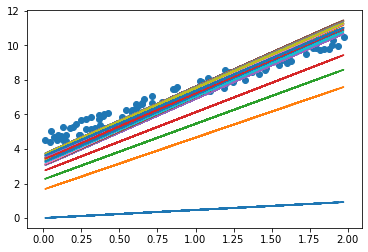

In [18]:
n_epochs = 1
n_iter = 20
sgd_thetas = get_thetas_sgd(X_const, y, n_iter, n_epochs)

plt.plot(X, X_const.dot(sgd_thetas))
plt.scatter(X, y)

### Using Scikitlearn
<b>SGDRgressor class</b>
1. cost function is MSE(default)
2. max_iter = 1000(default)
3. tolerance = 0.001 = 1e-3(default)
4. initial learning rate is 0.1, eta0 = 0.01(default)
5. default learning schedule is $\eta^t = eta0 / t^{power\_t}$ where eta0 = 0.01, power_t = 0.25 basically.

In [19]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1710295]), array([3.28642838]))

## Mini-batch gradient descent
Calculate a gradient <b>using small set of samples.</b>

In [20]:
def learning_schedule_mgd(iters):
    T0, T1 = 200, 1000
    return T0 / (iters + T1)

In [21]:
def get_thetas_mgd(X_const, y, n_iter, n_epochs, batch_size):
    theta = np.random.rand(2,1)
    thetas = theta.copy()
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X_const[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(n_iter):
            rand_idx = np.random.randint(m)
            Xi = X_shuffled[rand_idx: rand_idx + batch_size]
            yi = y_shuffled[rand_idx: rand_idx + batch_size]
            grad = 2/batch_size * (Xi.T).dot(Xi.dot(theta) - yi)
            lr = learning_schedule_mgd(m * epoch + i)
            theta = theta - lr * grad
            thetas = np.c_[thetas, theta]
    return thetas

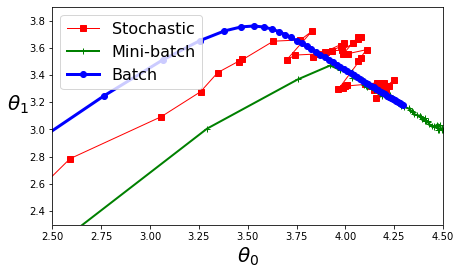

In [22]:
n_iter = 50
n_epochs = 1
batch_size = 30
init_learning_rate = 0.1

thetas_gd = get_thetas_grad(X_const, y, n_iter, init_learning_rate)
thetas_sgd = get_thetas_sgd(X_const, y, n_iter, n_epochs)
thetas_mgd = get_thetas_mgd(X_const, y, n_iter, n_epochs, batch_size)

plt.figure(figsize=(7,4))
plt.plot(thetas_sgd.T[:, 0], thetas_sgd.T[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(thetas_mgd.T[:, 0], thetas_mgd.T[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(thetas_gd.T[:, 0], thetas_gd.T[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# Polynomial Regression
From $y = 0.5X^2 + X + 2$, we can know that $\theta_{0} = 2, \theta_1 = 1, \theta_2 = 1/2$. 
## Polyfeatures
Polyfeatures can help to generate higher degrees data.

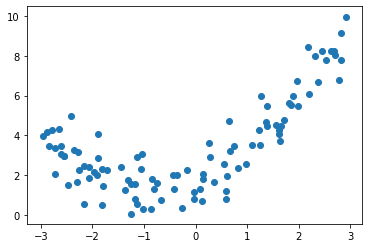

In [23]:
m = 100
np.random.seed(seed = 42)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree = 4, include_bias = False)
X_poly = poly_feat.fit_transform(X)
print(X[:2])
print(X_poly[:2])

[[-0.75275929]
 [ 2.70428584]]
[[-0.75275929  0.56664654 -0.42654845  0.32108831]
 [ 2.70428584  7.3131619  19.77688015 53.48233692]]


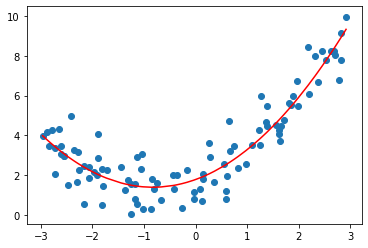

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_feat = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_feat.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_poly_pred = lin_reg.predict(X_poly)

dots = np.c_[X, y_poly_pred]
sorted_dots = dots[dots[:, 0].argsort()]

plt.scatter(X, y)
plt.plot(sorted_dots[:,0], sorted_dots[:,1], 'r-')

$\hat{\theta_{0}} = 1.78134581, \hat{\theta_1} = 0.93366893, \hat{\theta_2} = 0.56456263$. Estimated values are not exactly same with $\theta_{0} = 2, \theta_1 = 1, \theta_2 = 1/2$. This is due to Gaussian noise.

In [26]:
print(lin_reg.intercept_, lin_reg.coef_)

[1.78134581] [[0.93366893 0.56456263]]


<b>Caution: </b>Be aware of generating too many attributes since Polyfeatures generate (n+d)!/n!d! features.

# Learning Cureve
From the figure below, we can know that 30 degree polynomial model is overfitted severely, while linear model is underfitted.

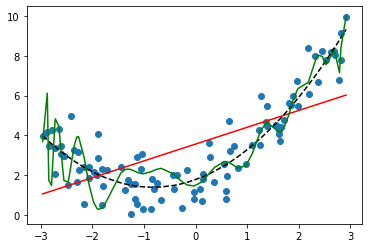

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

deg2 = PolynomialFeatures(degree = 2, include_bias = False)
deg30 = PolynomialFeatures(degree = 30, include_bias = False)
X2 = deg2.fit_transform(X)
X30 = deg30.fit_transform(X)

lin_reg_1 = LinearRegression(fit_intercept = True)
lin_reg_2 = LinearRegression(fit_intercept = True)
lin_reg_30 = LinearRegression(fit_intercept = True)

lin_reg_1.fit(X, y)
y_pred_1 = lin_reg_1.predict(X)
lin_reg_2.fit(X2, y)
y_pred_2 = lin_reg_2.predict(X2)
lin_reg_30.fit(X30, y)
y_pred_30 = lin_reg_30.predict(X30)

dots_1 = np.c_[X, y_pred_1]
sorted_dots1 = dots_1[dots_1[:, 0].argsort()]
dots_2 = np.c_[X, y_pred_2]
sorted_dots2 = dots_2[dots_2[:, 0].argsort()]
dots_30 = np.c_[X, y_pred_30]
sorted_dots30 = dots_30[dots_30[:, 0].argsort()]

plt.scatter(X, y)
plt.plot(sorted_dots1[:,0], sorted_dots1[:,1], 'r-')
plt.plot(sorted_dots2[:,0], sorted_dots2[:,1], 'k--')
plt.plot(sorted_dots30[:,0], sorted_dots30[:,1], 'g-')
plt.show()

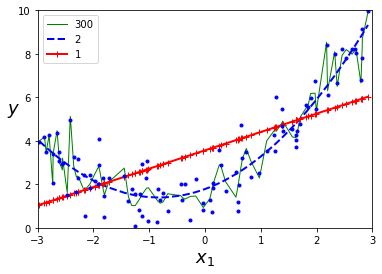

In [28]:
#This code is from https://github.com/rickiepark/handson-ml2
#Using pipeline seems more efficient!
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X)
    dots = np.c_[X, y_newbig]
    sorted_dots = dots[dots[:, 0].argsort()]
    plt.plot(sorted_dots[:,0], sorted_dots[:,1], style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


## Learning Curve
As we have seen before, we can measure the model's generalization performance by comparing score from training set and valid set. Also, we can compare the model's generalization performance by investigating learning curve! Figure below is showing <b>typical status of underfitting (1) two curves show parallel interval at the right side (2) the level of convergence is relatively high.</b>

If the model is underfitted, more data does not have effects. <b>Better attributes, more complex model is necessary.</b>

Text(0, 0.5, 'error')

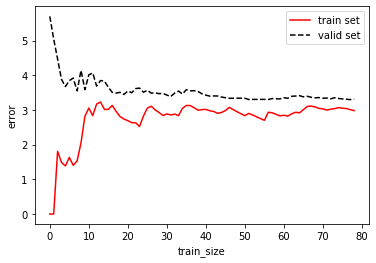

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
np.random.seed(10)

def plot_learning_curve(model, X, y):
    train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(train_X)):
        model.fit(train_X[:m], train_y[:m])
        train_pred_y = model.predict(train_X[:m])
        val_pred_y = model.predict(val_X)
        train_errors.append(mean_squared_error(train_y[:m], train_pred_y))
        val_errors.append(mean_squared_error(val_y, val_pred_y))
    plt.plot(train_errors, 'r-', label =  'train set')
    plt.plot(val_errors, 'k--', label =  'valid set')
    plt.legend()
    
plot_learning_curve(LinearRegression(), X, y)
plt.xlabel('train_size')
plt.ylabel('error')


Typical status of overfitting: <b>(1) the level of errors is much lower than linear regression (2) there exists a gap between two curves</b>

If the model is overfitted, more data can be helphul.

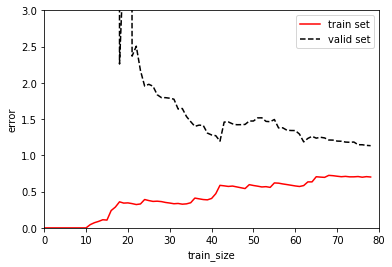

In [30]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.xlabel('train_size')
plt.ylabel('error')
plt.show()                        

## Bias/Variance Tradeoff
Generalization error of the model consists of 3 errors.
1. Bias: Erors due to the wrong assumption.
2. Variance: Exccesive sensitivity from little variation of train data. A model with higher degree is likely to have high variance
3. Irreduceable error: Noise from data

When model is more complex, variance gets bigger while bias decreases.

# Linear model with Regulation
Overfitting can decrease by regulating model. (1) decrease degrees of freedom (2) decrease degree of polynomial

In linear regression model, we regulate model by limiting weights. Since model with regulation is sensitive to the scale of attributes, preprocessing is required.
## Ridge Regression(L2)
* $J(\theta) = MSE(\theta) + \alpha$$1 \over 2$$\Sigma^n_{i=1}\theta_i^{2}$: Cost function when model is trained, Try to keep weights as small as possible. ($\theta_0$ does not regulated)
* $J(\theta) = MSE(\theta) $: Cost function when model is tested

<b>Gradient gradually decrease as $\hat{\theta}$ converges to zero vectors. Thus, an optimal point (solution of $\theta$) of ridge model cannot equal to zero vectors completely even though $\alpha$ is very big.</b> In lasso model, gradient does not decrease, and optimal point can equal to zero vectors.

In [31]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

Text(0, 0.5, 'y')

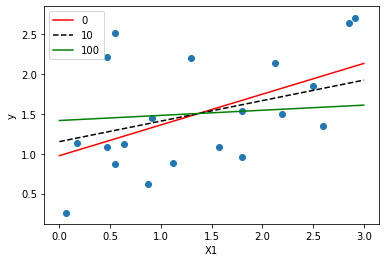

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge

alphas = [0, 10, 100]
styles = ['r-','k--','g-']
pred_list = []
for alpha, style in zip(alphas, styles):
    ridge_pipe = Pipeline([
        ('std_scaler', StandardScaler()),
        ('ridge', Ridge(alpha = alpha, ))
    ])
    ridge_pipe.fit(X, y)
    y_pred = ridge_pipe.predict(X_new)
    plt.plot(X_new, y_pred, style, label=str(alpha))
    plt.legend()
plt.scatter(X, y)
plt.xlabel('X1')
plt.ylabel('y')

Text(0, 0.5, 'y')

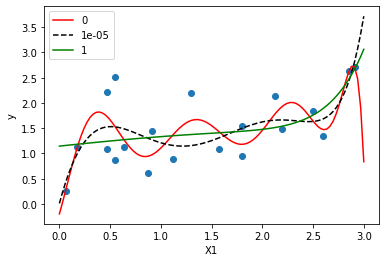

In [33]:
alphas = [0, 1e-05, 1]
styles = ['r-','k--','g-']
pred_list = []
for alpha, style in zip(alphas, styles):
    ridge_pipe = Pipeline([
        ('poly_10', PolynomialFeatures(degree = 10, include_bias = False)),
        ('std_scaler', StandardScaler()),
        ('ridge', Ridge(alpha = alpha, ))
    ])
    ridge_pipe.fit(X, y)
    y_pred = ridge_pipe.predict(X_new)
    plt.plot(X_new, y_pred, style, label=str(alpha))
    plt.legend()
plt.scatter(X, y)
plt.xlabel('X1')
plt.ylabel('y')

$\hat{\theta} = (X^TX + \alpha I_n)^{-1}X^Ty$, where $I_n$ is (n+1) by (n+1) identity matrix with 0 value in first diagonal value ($\theta_0$ does not regulated)
* Using Cholesky decomposition, $\hat{\theta} = (X^TX + \alpha I_n)^{-1}X^Ty = (LL^T)X^Ty$

### Using Scikitlearn

In [34]:
from sklearn.linear_model import Ridge

ridge = Ridge(solver = 'cholesky', alpha = 1)
ridge.fit(X, y)
ridge.predict([[1.5]])

array([[1.55071465]])

In [35]:
from sklearn.linear_model import SGDRegressor

sgd_l2 = SGDRegressor(penalty = 'l2')
sgd_l2.fit(X, y)
sgd_l2.predict([[1.5]])

c:\users\namte\.conda\envs\ml\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.46543286])

## Lasso Regression(L1)
* $J(\theta) = MSE(\theta) + \alpha\Sigma^n_{i=1}|\theta_i|$: Cost function when model is trained ($\theta_0$ does not regulated)
* $J(\theta) = MSE(\theta) $: Cost function when model is tested

Lasso model makes <b>sparse model</b>: When alpha is high, coefficients of high degree attributes become zero. (= eliminate weights of less important attributes). To make lasso model return stable optiaml point, we need to decrease learning rate gradually.

c:\users\namte\.conda\envs\ml\lib\site-packages\sklearn\pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
c:\users\namte\.conda\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\users\namte\.conda\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.446263664309721, tolerance: 0.0009294783355207351
  positive)


Text(0, 0.5, 'y')

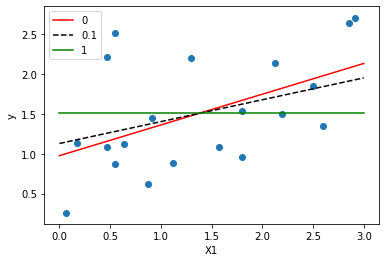

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso

alphas = [0, 0.1, 1]
styles = ['r-','k--','g-']
pred_list = []
for alpha, style in zip(alphas, styles):
    lasso_pipe = Pipeline([
        ('std_scaler', StandardScaler()),
        ('lasso', Lasso(alpha = alpha, ))
    ])
    lasso_pipe.fit(X, y)
    y_pred = lasso_pipe.predict(X_new)
    plt.plot(X_new, y_pred, style, label=str(alpha))
    plt.legend()
plt.scatter(X, y)
plt.xlabel('X1')
plt.ylabel('y')

c:\users\namte\.conda\envs\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  positive)


Text(0, 0.5, 'y')

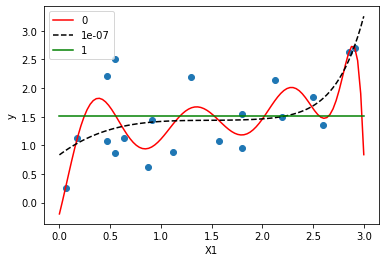

In [37]:
from sklearn.pipeline import Pipeline
alphas = [0, 1e-07, 1]
styles = ['r-','k--','g-']
pred_list = []
for alpha, style in zip(alphas, styles):
    if alpha > 0:
        lasso_pipe = Pipeline([
            ('poly_10', PolynomialFeatures(degree = 10, include_bias = False)),
            ('std_scaler', StandardScaler()),
            ('lasso', Lasso(alpha = alpha,))
        ])
        lasso_pipe.fit(X, y)
        y_pred = lasso_pipe.predict(X_new)
    elif alpha == 0:
        linear_pipe = Pipeline([
            ('poly_10', PolynomialFeatures(degree = 10, include_bias = False)),
            ('std_scaler', StandardScaler()),
            ('lasso', LinearRegression())
        ])
        linear_pipe.fit(X, y)
        y_pred = linear_pipe.predict(X_new)
    plt.plot(X_new, y_pred, style, label=str(alpha))
    plt.legend()
plt.scatter(X, y)
plt.xlabel('X1')
plt.ylabel('y')

## Ridge vs Lasso

In [38]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

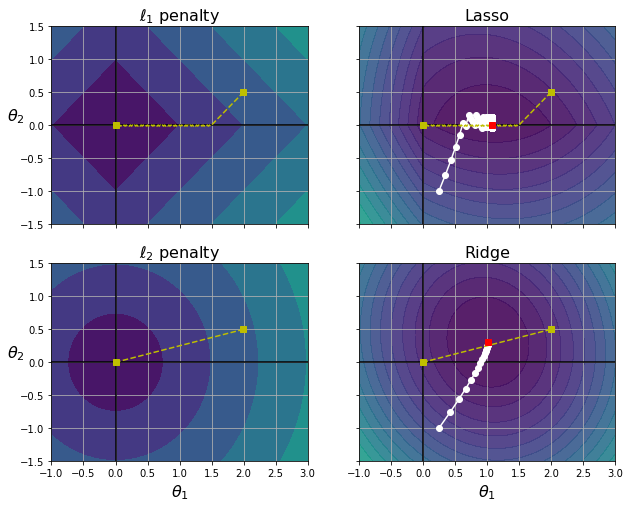

In [39]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

plt.show()

## Elasticnet
$J(\theta) = MSE(\theta) + \alpha$$1 \over 2$$\Sigma^n_{i=1}\theta_i^{2}+ r\alpha\Sigma^n_{i=1}|\theta_i|$:

Mixture of the ridge and lasso models. 'r' is the mixture rate. If r = 1, elasicnet equals to lasso model.

### When to use ridge, lasso or elasticnet?
1. In general, models with regulation is better than a model without regulation
2. Ridge model is basic.
3. If you think that only some atributes are valid for prediction, lasso or elasticnet is appropriate.
4. If # of attributes are bigger than # of samples or some attributes are associated strongly, elasticnet is prefered

In [40]:
from sklearn.linear_model import ElasticNet

ela = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
ela.fit(X, y)
ela.predict([[1.5]])

array([1.54333232])

# Early Stopping
: In learning curve, stop training when valid error soars.

In [41]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [42]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

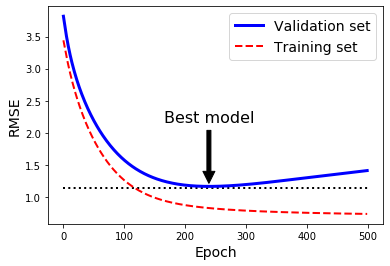

In [43]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

# Logistic Regression
: Regression algorithm for classification.
* estimates the probability that a sample is belong to the specific class
* binary classifier

## Probability Estimation
$\hat{p} = h_{\theta}(x) = \sigma(\theta^Tx), where \sigma(t) = 1 / (1 + exp(-t))$
* $\hat{y} = 1 \iff \hat{p} > 0.5 \iff t > 0$. That is, if t is bigger than 0, model predicts that the sample is belong to positive class.

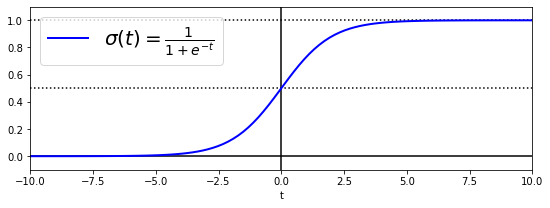

In [44]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

### Cost Function
$J(\theta) = -$$1 \over m$$\Sigma^m_{i=1}[y^ilog(\hat{p}^i) + (1-y^i)log(1-\hat{p}^i)]$

There is no analysis method. However, since this function is convex, numerical method (ex.gradient descent) is possible. Using<br>$\partial \over \partial \theta_j$ $J(\theta) = $ $1 \over m$ $\Sigma^m_{i=1}(\sigma(\theta^Tx^i) - y^i)x^i_j$, we can apply mini-batch gradient descent or stocahstic gradient descent.

### Decision Boundary

In [45]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [46]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
X = iris["data"][:, 3:]  # width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris label is virginica, 0 else

In [48]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

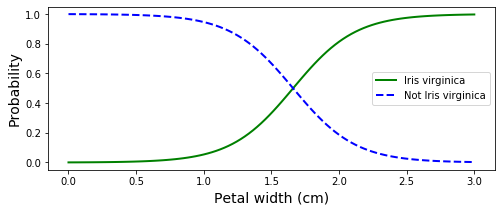

In [49]:
X_new = np.linspace(0, 3, 100).reshape(-1, 1)
y_proba = log_clf.predict_proba(X_new)

plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.legend()
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.show()

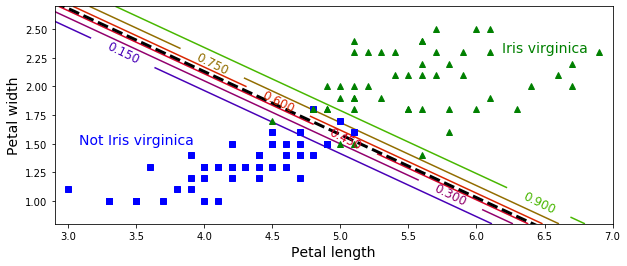

In [50]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## Multinomial Logisticregression
$score of class k = s_k(\mathbf{x}) = (\theta^k)^Tx$
### Softmax Function
$ \hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}} $

In [51]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Cross Entropy
$ J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)} $

### Gradient Vector of Cross Entropy
$ \nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}} $

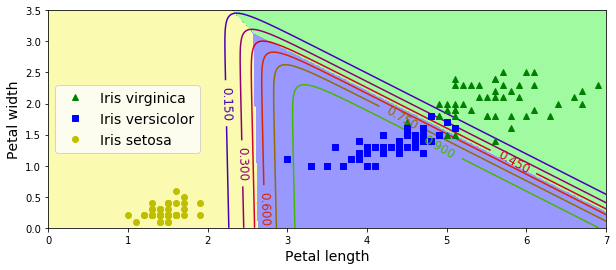

In [52]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [53]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


Friends' Question
* (p163) singular value decomposition
* (p173) Why can be stuck in local minimum when learning rate decrease slowly?
* (p174) Why model cannot be optimized when sample is not shuffled?
* Can we use kernel trick in SGD?